In [11]:
import numpy as np
import matplotlib.pyplot as plt
import os
import moviepy.video.io.ImageSequenceClip
import imageio

(-1.0999855587625644,
 1.0999993123220269,
 -1.0999962177646454,
 1.0999962177646454)

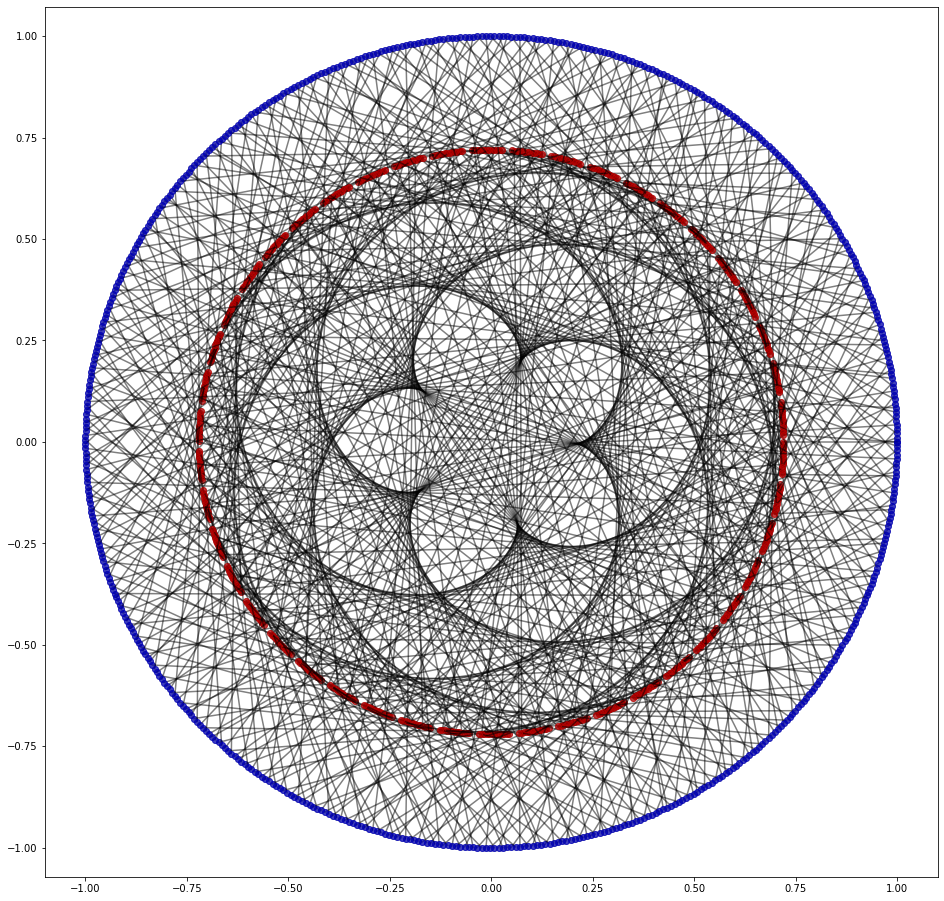

In [12]:
# Orbital radii (AU) and periods (Earth days) for Earth (e) and Venus (v).
re, rv, Te, Tv = 1, 0.72, 365.25, 224.7

# Number of Earth years to plot for and total number of positions to sample.
n, N = 8, 600

# Time grid and corresponding angular position of the two planets.
t = np.linspace(0, n*Te, N)
thetae = t * 2*np.pi / Te
thetav = t * 2*np.pi / Tv

# Polar to Cartesian conversion
xe, ye = re * np.cos(thetae), re * np.sin(thetae)
xv, yv = rv * np.cos(thetav), rv * np.sin(thetav)

fig = plt.figure(figsize = (16,16))

for i in range(len(thetae)):
    plt.plot([xe[i], xv[i]], [ye[i], yv[i]], '-o',color='k', alpha=0.5)
    plt.plot(xv[i],  yv[i], 'o',color='r', alpha=0.5)
    plt.plot(xe[i], ye[i], 'o',color='b', alpha=0.5)
plt.axis('equal')
#plt.axis('off')
#plt.show()

In [60]:
save_folder = 'orbitas/terra_venus'

In [3]:
save_folder ='orb'
save_folder2 = 'terra_venus'

In [13]:
def plot_planets(ax1,ax2,i):
    ax1.plot([xe[i], xv[i]], [ye[i], yv[i]], '-o',color='k', alpha=0.5)
    ax1.plot(xv[i],  yv[i], 'o',color='r', alpha=0.5)
    ax1.plot(xe[i], ye[i], 'o',color='b', alpha=0.5)
    ax1.axis('equal')
    ax1.tick_params(axis='both',which='minor', direction = "in",
                    top = True,right = True, length=5,width=1,labelsize=15)
    ax1.tick_params(axis='both',which='major', direction = "in",
                    top = True,right = True, length=8,width=1,labelsize=15)
    ax1.set_xlabel(r'$X$ [U.A.]', fontsize=15)
    ax1.set_ylabel(r'$Y$ [U.A.]', fontsize=15)
    #ax1.set_yticklabels([])
    #ax1.set_xticklabels([])
    #ax1.axis('off')

    ax2.plot(thetae[i], re, 'bo', alpha=0.5)
    ax2.plot(thetav[i], rv, 'ro', alpha=0.5)
    #ax2.axis('off')
    ax2.set_yticklabels([])
    ax2.set_xticklabels([])

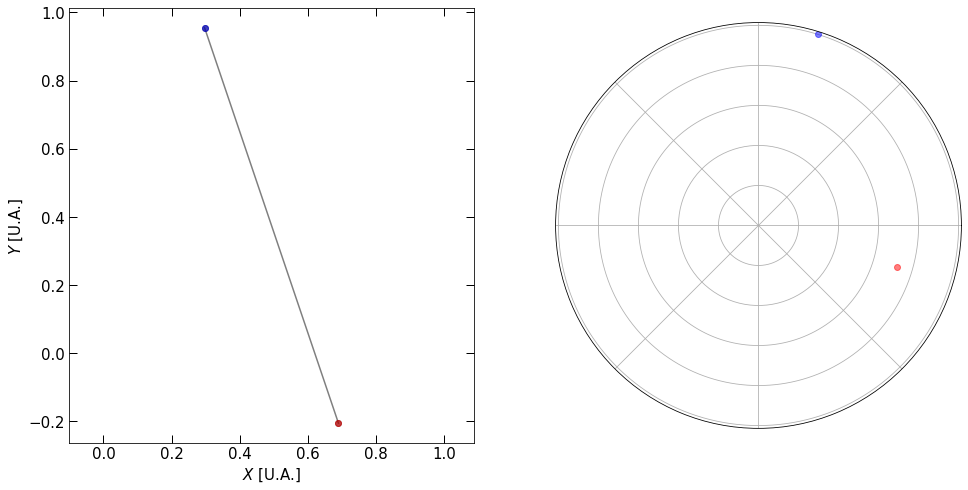

In [16]:
fig = plt.figure(figsize=(16,8))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122, projection='polar')
i=90
plot_planets(ax1,ax2,i)
plt.savefig(save_folder+'/v.png', bbox_inches='tight',dpi=150,transparency=True)

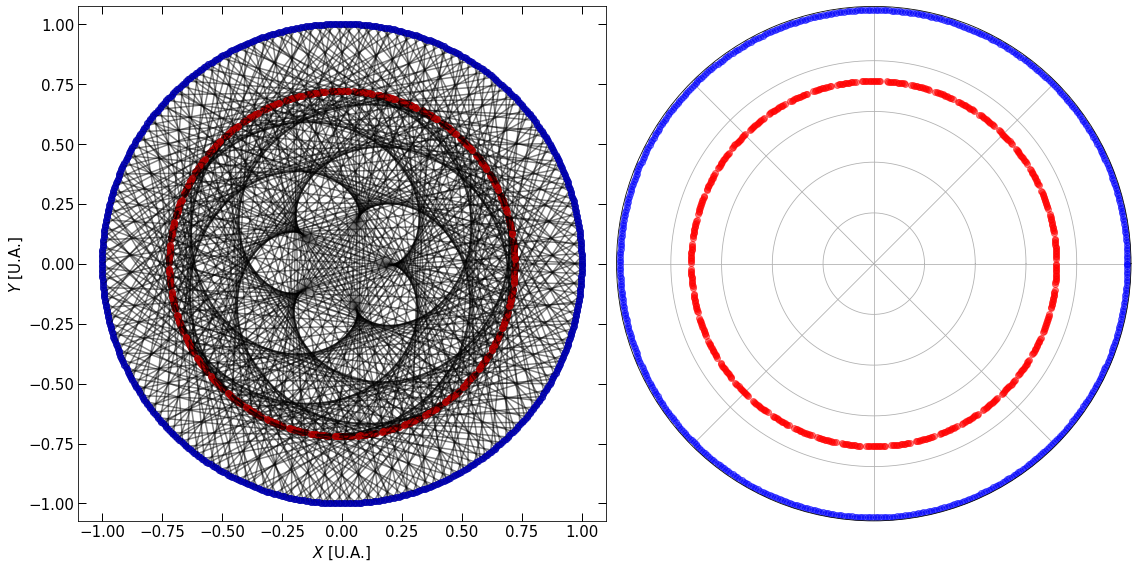

In [17]:
fig = plt.figure(figsize=(16,8))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122, projection='polar')

for i in range(len(thetae)):
    plot_planets(ax1,ax2,i)
    plt.tight_layout()

    plt.savefig('{}/{}/{:03d}.png'.format(save_folder,save_folder2, i), bbox_inches='tight',dpi=150,transparency=True)

In [18]:
images = []
image_folder = save_folder + '/' + save_folder2 #+ '/'
image_files = [image_folder+'/'+img for img in os.listdir(image_folder) if img.endswith(".png")]

for filename in image_files:
    images.append(imageio.imread(filename))
    
imageio.mimsave(save_folder+'/venus_terra.gif', images)

![a](orb/venus_terra.gif)